## Black Friday Dataset EDA and FE
### Cleaning and preparing the data for modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# Importing the dataset
df_train = pd.read_csv("/content/train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Always import the test data and combine it with train data
# Helpful in Kaggle competitions

In [4]:
# Importing test dataset
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# Merging both the datasets
# Keeping in mind we need to actually append the data i.e. to add the test data after train data
# We use append instead of merge

'''
df = df_train.append(df_test)
df.head()
'''

# The .append() method was removed in pandas v2.0 (April 2023).
# Use pd.concat() instead — it’s the modern, faster, and recommended method.

'\ndf = df_train.append(df_test)\ndf.head()\n'

In [7]:
df = pd.concat([df_train, df_test], ignore_index = True)

# pd.concat([...]) combines DataFrames along a particular axis (rows by default).
# ignore_index=True resets the index after combining (so it doesn’t duplicate old indices).

# EXAMPLE: Resets the index

'''
   A  B
0  1  3
1  2  4
0  5  7
1  6  8
'''

'''
   A  B
0  1  3
1  2  4
2  5  7
3  6  8
'''

'\n   A  B\n0  1  3\n1  2  4\n2  5  7\n3  6  8\n'

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
# We do not necessarily need the User_ID
# Wecan drop that column
# axis = 0 -> Row
# axis = 1 -> Column

df.drop(['User_ID'], axis = 1, inplace = True)

In [13]:
df.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


### Categorical Data:
1. Gender
2. Age
3. City_Category

In [14]:
# Converting Gender to Numerical
# Handling Categorical Feature Gender
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [15]:
df.head(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [17]:
# Handling Categorical Feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
# Ranking by mapping to convert Age to Numerical

df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

### We can also use label encoding
```
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Sample dataset
data = pd.DataFrame({
    'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', 'Orange', 'Banana'],
    'Price': [1.2, 0.5, 0.8, 1.3, 0.9, 0.6]
})

# Initialize and fit LabelEncoder
le = LabelEncoder()
data['Fruit_Encoded'] = le.fit_transform(data['Fruit'])

print(data)
print("Category Mapping:", le.classes_)
```

### We encoded ordinal data
```
data = pd.DataFrame({
    'Satisfaction': ['Low', 'High', 'Medium', 'Low', 'High'],
    'Score': [3, 8, 5, 2, 9]
})

satisfaction_order = {'Low': 0, 'Medium': 1, 'High': 2}
data['Satisfaction_Encoded'] = data['Satisfaction'].map(satisfaction_order)

print(data)
```


In [19]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


---

# `pd.get_dummies()` — One-Hot Encoding in Pandas

---

## 📘 What It Does

`pd.get_dummies()` converts **categorical (text) data** into **numerical dummy variables (0s and 1s)**.
This process is called **One-Hot Encoding** — and it’s essential because ML models can’t handle text directly.

---

## 🧩 Example 1: Basic Usage

**Input DataFrame:**

```python
import pandas as pd

df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female']
})
```

**Output:**

```
   Gender
0    Male
1  Female
2    Male
3  Female
```

**Apply get_dummies():**

```python
pd.get_dummies(df)
```

**Result:**

```
   Gender_Female  Gender_Male
0              0            1
1              1            0
2              0            1
3              1            0
```

✅ Each category becomes a new column.
✅ Value = 1 if that category applies, otherwise 0.

---

## 🧩 Example 2: Multiple Columns

```python
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female'],
    'City': ['Delhi', 'Mumbai', 'Delhi']
})

pd.get_dummies(df)
```

**Output:**

```
   Gender_Female  Gender_Male  City_Delhi  City_Mumbai
0              0            1           1            0
1              1            0           0            1
2              1            0           1            0
```

---

## ⚙️ Common Parameters

### 1️⃣ `columns=`

Encode only selected columns.

```python
pd.get_dummies(df, columns=['Gender'])
```

---

### 2️⃣ `drop_first=True`

Drops the first category to avoid multicollinearity.

```python
pd.get_dummies(df, drop_first=True)
```

**Output:**

```
   Gender_Male  City_Mumbai
0            1            0
1            0            1
2            0            0
```

---

### 3️⃣ `prefix` and `prefix_sep`

Custom column names.

```python
pd.get_dummies(df, prefix=['G', 'C'], columns=['Gender', 'City'])
```

**Output:**

```
   G_Female  G_Male  C_Delhi  C_Mumbai
0         0       1        1         0
1         1       0        0         1
2         1       0        1         0
```

---

## ✅ When to Use

* Before training ML models.
* For categorical columns like Gender, City, Product, Country.
* When categories are limited in number.

---

## ⚠️ When *Not* to Use

* If a column has too many unique values (e.g., 10,000 cities).
  → Use **Label Encoding** or **Embeddings** instead.

---



In [20]:
# Handling Categorical feature City_Category
df_city = pd.get_dummies(df['City_Category'], drop_first = True)

In [21]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


---

# Why `pd.get_dummies()` Shows True/False Instead of 0/1

---

## 📘 Situation

```python
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
```

Output:

```
       B      C
0  False  False
1  False  False
2  False  False
3  False   True
4  False  False
```

---

## 🤔 Why True/False?

* In **pandas v2.1+**, `pd.get_dummies()` now returns **boolean (True/False)** columns by default.
* This saves memory and speeds up operations.
* In older pandas versions, the same code returned **0/1 integers**.

---

## ✅ How to Get 0/1 Instead

Add the `dtype` parameter:

```python
df_city = pd.get_dummies(df['City_Category'], drop_first=True, dtype=int)
```

Output:

```
   B  C
0  0  0
1  0  0
2  0  0
3  0  1
4  0  0
```

---

## 💡 Best Practice

Always use:

```python
pd.get_dummies(df, drop_first=True, dtype=int)
```

✅ Ensures numeric 0/1 output
✅ Works across all pandas versions
✅ Safe for Machine Learning models that expect numerical input

---



In [22]:
df_city = pd.get_dummies(df['City_Category'], drop_first = True, dtype = int)

In [23]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


---

# Why We Use `drop_first=True` in `pd.get_dummies()`

---

## 📘 What It Does

When you create dummy variables using:

```python
pd.get_dummies(df, drop_first=True)
```

it **drops one dummy column per categorical feature** (usually the first one).
This is done to avoid a problem called **multicollinearity**.

---

## 🧩 Example

### Without `drop_first=True`

```python
import pandas as pd

df = pd.DataFrame({'Gender': ['Male', 'Female', 'Male']})
pd.get_dummies(df)
```

**Output:**

```
   Gender_Female  Gender_Male
0              0            1
1              1            0
2              0            1
```

Now we have **two columns** representing the same variable.

---

## ⚠️ What’s the Problem?

Let’s see what happens:

| Gender_Female | Gender_Male | Meaning |
| ------------- | ----------- | ------- |
| 0             | 1           | Male    |
| 1             | 0           | Female  |

If you look closely —
`Gender_Female` and `Gender_Male` **always move in the opposite direction.**
So if you know one, you can perfectly predict the other.

➡️ This creates **perfect correlation** → called **multicollinearity**.

In Linear Regression or Logistic Regression, this makes the model **unstable** and **coefficients unreliable** (because the model can’t tell which column is actually causing the effect).

---

## ✅ When We Use `drop_first=True`

```python
pd.get_dummies(df, drop_first=True)
```

**Output:**

```
   Gender_Male
0            1
1            0
2            1
```

Now, only one column is kept (`Gender_Male`), and:

* If it’s **1 → Male**
* If it’s **0 → Female**

The model still gets all the information — no information loss, and **no multicollinearity**.

---

## ⚙️ Quick Summary

| Setting            | Columns Created        | Issue                       | Best For                                        |
| ------------------ | ---------------------- | --------------------------- | ----------------------------------------------- |
| `drop_first=False` | All dummy columns      | May cause multicollinearity | Tree-based models (e.g., RandomForest, XGBoost) |
| `drop_first=True`  | Drops one dummy column | Avoids multicollinearity    | Linear/Logistic Regression                      |

---

## 💡 Best Practice

✅ Use `drop_first=True` when working with **linear models**
✅ Use `drop_first=False` (keep all columns) for **tree-based models** — they don’t mind correlated features.

---


In [24]:
# Add the df_city in df

df = pd.concat([df, df_city], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [25]:
# Under City_Category
# There are only 3 categories and dropping 1 will still represent 3 categories
# So we set drop_first = True

# Since we have added B and C
# Drop City_Category Column

In [27]:
df.drop('City_Category', axis = 1, inplace = True)

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


### Missing Values


In [29]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [30]:
# Product_Category_2
# Product_Category_3
# Purchase

In [31]:
# Focus on replacing missing values

df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [32]:
# discrete values
# nan

df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [33]:
# Replace the missing value with mode
df['Product_Category_2'].mode()

,Product_Category_2
0,8.0


In [34]:
df['Product_Category_2'].mode()[0]
# to get one value

np.float64(8.0)

In [35]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [36]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [37]:
# Similarly check for Product_category_3 if it also has discrete and nan

df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [38]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


In [39]:
df['Product_Category_3'].mode()

,Product_Category_3
0,16.0


In [40]:
df['Product_Category_3'].mode()[0]

np.float64(16.0)

In [41]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [42]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [43]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [45]:
# Replace 4+ with 4

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [48]:
# Convert obj into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


### Visualization

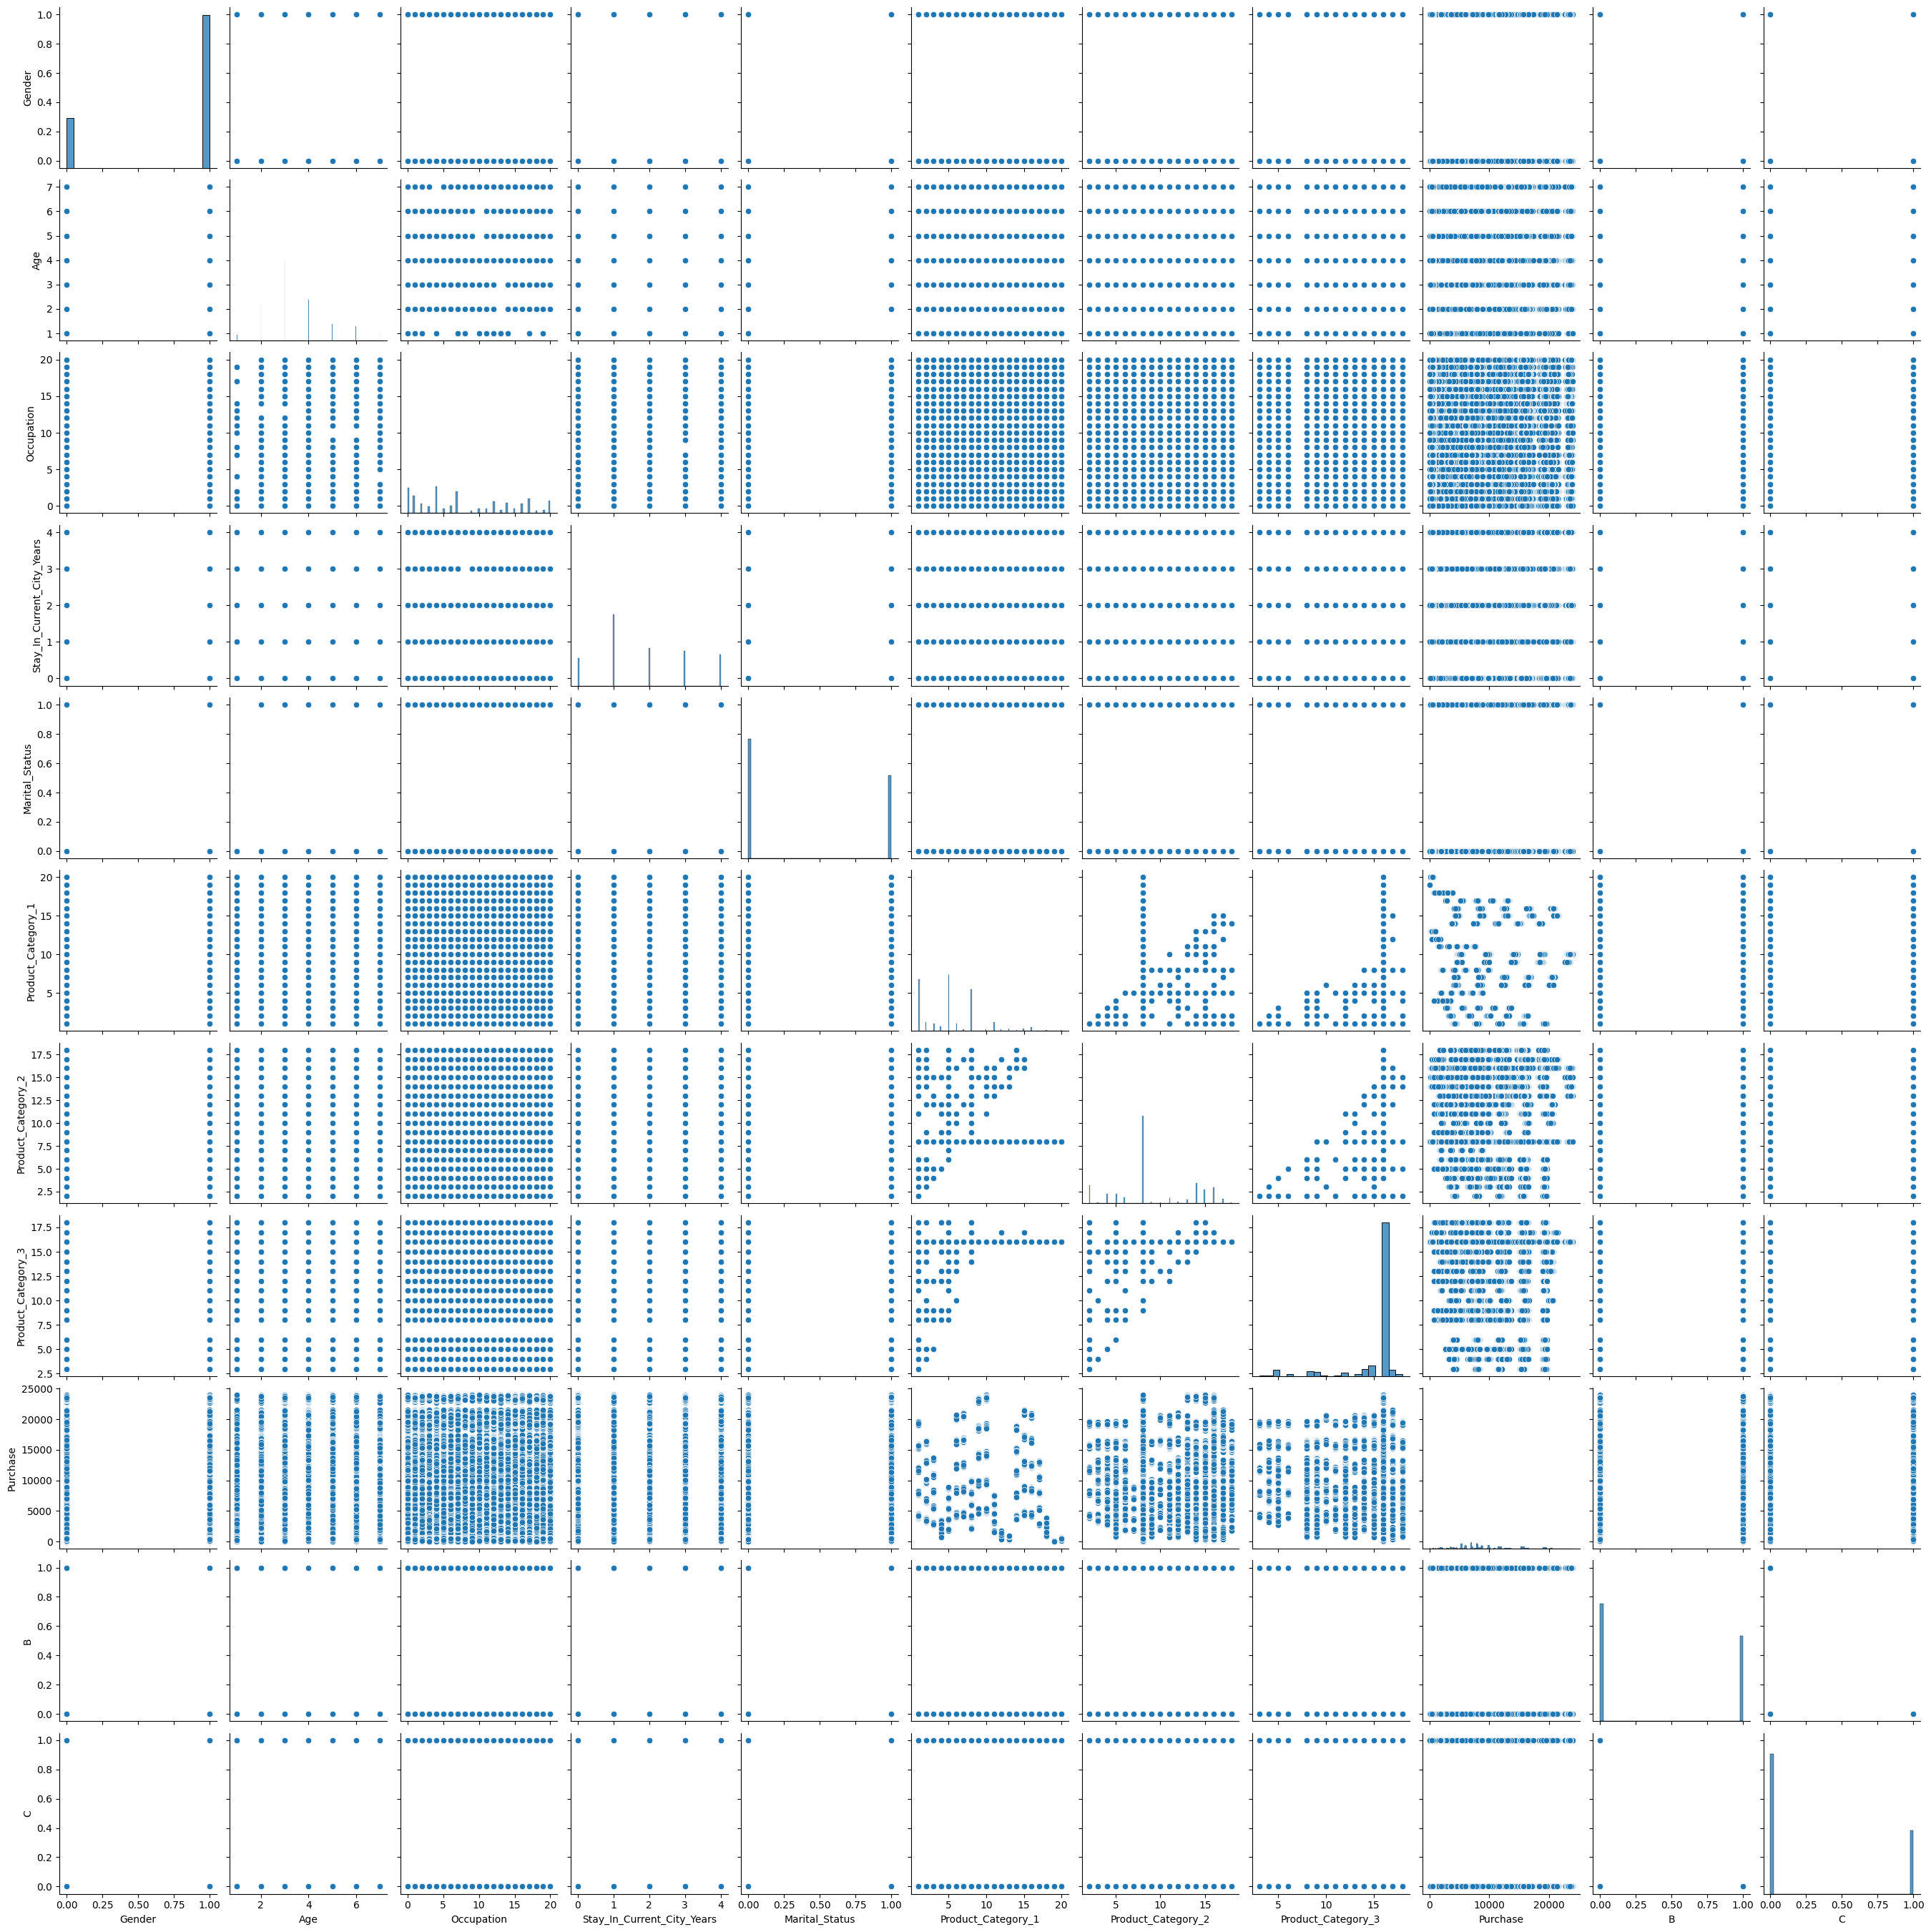

In [50]:
sns.pairplot(df)

What You Can Infer, even though the image looks dense, here’s what it usually tells you:

1. If points form a diagonal line → strong positive or negative correlation

  - e.g., if Product_Category_1 increases as Purchase increases → positive correlation.

2. If points are scattered randomly → no correlation between those features.

3. If distributions (diagonal plots) are skewed → variable is not normally distributed.

4. If you see stacked lines → likely categorical variables coded as numbers (e.g., Gender, Age, Occupation).
These don’t make sense in scatterplots and should be encoded differently.

Why It Looks So Dense?

You probably included all columns, including categorical or dummy variables (e.g., Gender, Age, City_Category).

Pairplot is best used on continuous numerical features only, like:
```
sns.pairplot(df[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']])
```

<Axes: xlabel='Age', ylabel='Purchase'>

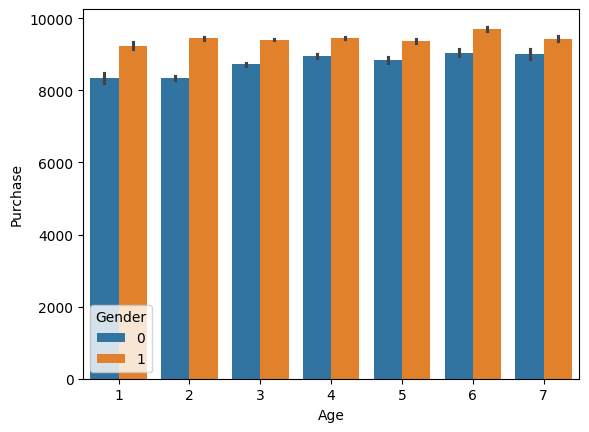

In [51]:
sns.barplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender')

Observations:
1. Purchasing power of all age groups is quite similar.
2. Purchasing power of men is higher.

<Axes: xlabel='Occupation', ylabel='Purchase'>

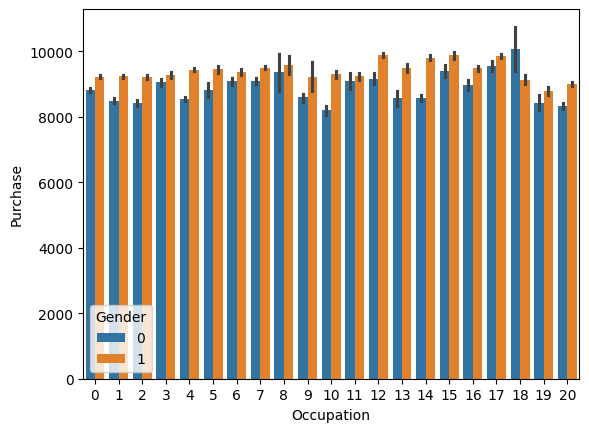

In [52]:
sns.barplot(data = df, x = 'Occupation', y = 'Purchase', hue = 'Gender')

Observation: This is quite uniform as well.

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

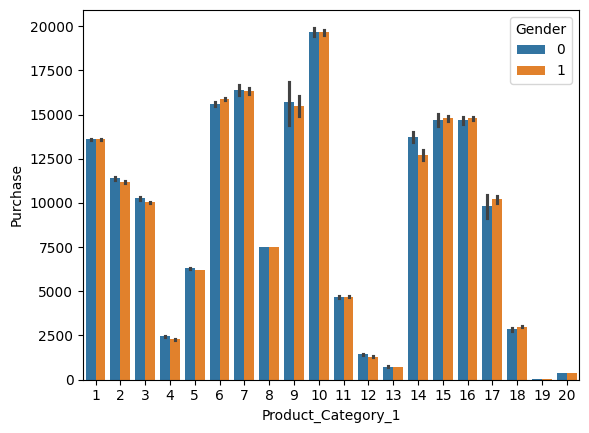

In [53]:
sns.barplot(data = df, x = 'Product_Category_1', y = 'Purchase', hue = 'Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

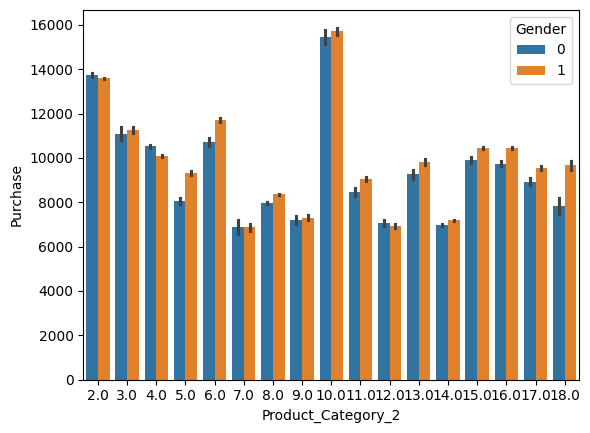

In [54]:
sns.barplot(data = df, x = 'Product_Category_2', y = 'Purchase', hue = 'Gender')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

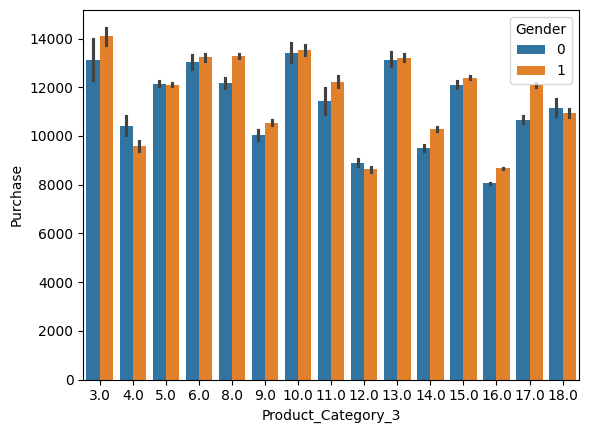

In [55]:
sns.barplot(data = df, x = 'Product_Category_3', y = 'Purchase', hue = 'Gender')

Observation: Product_Category_1 purchased highest.

In [56]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


# Feature Scaling

In [57]:
df_test = df[df['Purchase'].isnull()]

In [58]:
df_train = df[~df['Purchase'].isnull()]

In [65]:
X = df_train.drop('Purchase',axis = 1)

In [66]:
X

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,0,1


In [67]:
X.shape

(550068, 11)

In [68]:
y = df_train['Purchase']

In [69]:
y

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
550063,368.0
550064,371.0
550065,137.0
550066,365.0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
X_train.drop('Product_ID', axis = 1, inplace = True)
X_test.drop('Product_ID', axis = 1, inplace = True)

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Now train your model